In [621]:
import numpy as np
import pandas as pd

In [622]:
data=pd.read_csv(r'E:\Praxis-BA-18\Term-2\datasets\makemytrip\dataset\train.csv')

In [623]:
data.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,b,18.42,10.415,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1
1,2,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0,1
2,3,b,30.17,1.085,y,p,c,v,0.040,f,f,0,f,g,170.0,179,1
3,4,b,22.67,2.540,y,p,c,h,2.585,t,f,0,f,g,0.0,0,0
4,5,a,36.00,1.000,u,g,c,v,2.000,t,t,11,f,g,0.0,456,0


In [624]:
data.shape

(552, 17)

In [625]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 17 columns):
id    552 non-null int64
A     544 non-null object
B     543 non-null float64
C     552 non-null float64
D     547 non-null object
E     547 non-null object
F     545 non-null object
G     545 non-null object
H     552 non-null float64
I     552 non-null object
J     552 non-null object
K     552 non-null int64
L     552 non-null object
M     552 non-null object
N     541 non-null float64
O     552 non-null int64
P     552 non-null int64
dtypes: float64(4), int64(4), object(9)
memory usage: 73.4+ KB


In [626]:
data.isnull().sum()

id     0
A      8
B      9
C      0
D      5
E      5
F      7
G      7
H      0
I      0
J      0
K      0
L      0
M      0
N     11
O      0
P      0
dtype: int64

In [627]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [628]:
data=data.drop('id',axis=1)

In [629]:
data['A']=le.fit_transform(data['A'].astype(str))
data['D']=le.fit_transform(data['D'].astype(str))
data['E']=le.fit_transform(data['E'].astype(str))
data['F']=le.fit_transform(data['F'].astype(str))
data['G']=le.fit_transform(data['G'].astype(str))
data['I']=le.fit_transform(data['I'].astype(str))
data['J']=le.fit_transform(data['J'].astype(str))
data['L']=le.fit_transform(data['L'].astype(str))
data['M']=le.fit_transform(data['M'].astype(str))

In [630]:
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,18.42,10.415,3,3,0,8,0.125,1,0,0,0,0,120.0,375,1
1,0,21.75,11.750,2,0,1,8,0.250,0,0,0,1,0,180.0,0,1
2,1,30.17,1.085,3,3,1,8,0.040,0,0,0,0,0,170.0,179,1
3,1,22.67,2.540,3,3,1,3,2.585,1,0,0,0,0,0.0,0,0
4,0,36.00,1.000,2,0,1,8,2.000,1,1,11,0,0,0.0,456,0


In [631]:
import matplotlib.pyplot as plt
%matplotlib inline

# Outlier  and missing value treatment


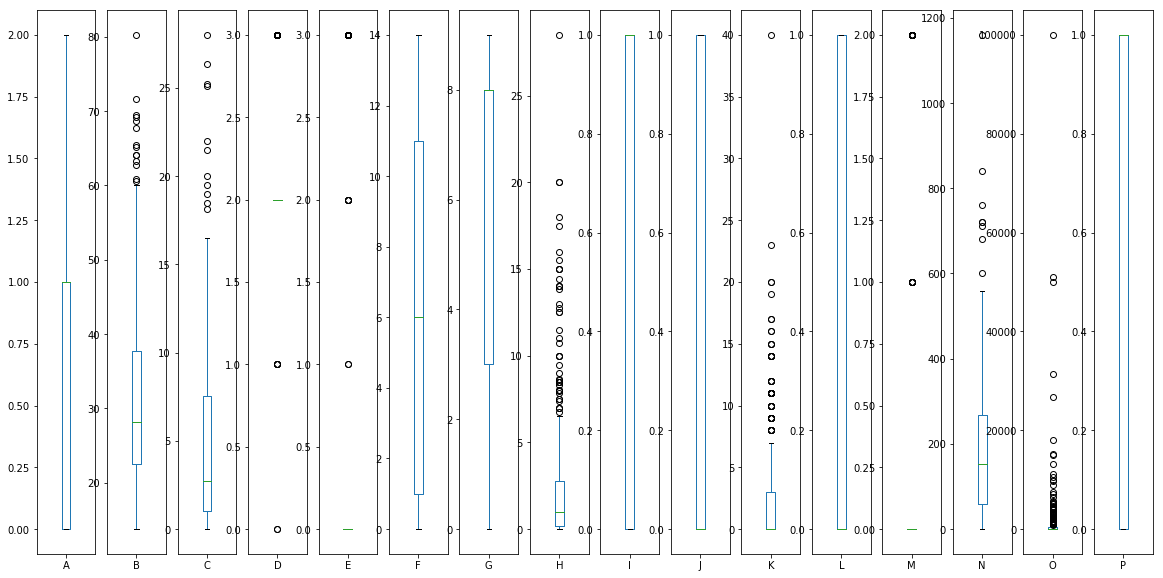

In [632]:
data.plot(kind='box',subplots=True,sharex=False,sharey=False,figsize=(20,10))
plt.show()

In [633]:
data.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
count,552.000000,543.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,541.000000,552.000000,552.000000
mean,0.706522,31.364899,4.780136,2.217391,0.722826,6.088768,5.686594,2.259176,0.518116,0.422101,2.318841,0.460145,0.186594,175.162662,1087.576087,0.552536
std,0.486583,11.873665,4.938454,0.458659,1.274198,4.638795,2.961575,3.442564,0.500125,0.494343,4.297867,0.498861,0.571210,154.873746,5758.841945,0.497683
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.500000,1.000000,2.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.170000,2.750000,2.000000,0.000000,6.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,152.000000,3.500000,1.000000
75%,1.000000,37.665000,7.561250,2.000000,0.000000,11.000000,8.000000,2.750000,1.000000,1.000000,3.000000,1.000000,0.000000,268.000000,364.750000,1.000000
max,2.000000,80.250000,28.000000,3.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,40.000000,1.000000,2.000000,1160.000000,100000.000000,1.000000


Using MICE imputed Missing values

In [634]:
import missingno as mn
import fancyimpute
from sklearn.preprocessing import Imputer

In [635]:
fai=fancyimpute.MICE(verbose=False)
df=fai.complete(data)
data=pd.DataFrame(df)

In [636]:
var=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']

In [637]:
data.columns=var

In [638]:
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1.0,18.42,10.415,3.0,3.0,0.0,8.0,0.125,1.0,0.0,0.0,0.0,0.0,120.0,375.0,1.0
1,0.0,21.75,11.750,2.0,0.0,1.0,8.0,0.250,0.0,0.0,0.0,1.0,0.0,180.0,0.0,1.0
2,1.0,30.17,1.085,3.0,3.0,1.0,8.0,0.040,0.0,0.0,0.0,0.0,0.0,170.0,179.0,1.0
3,1.0,22.67,2.540,3.0,3.0,1.0,3.0,2.585,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,36.00,1.000,2.0,0.0,1.0,8.0,2.000,1.0,1.0,11.0,0.0,0.0,0.0,456.0,0.0


In [639]:
data.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
N    0
O    0
P    0
dtype: int64

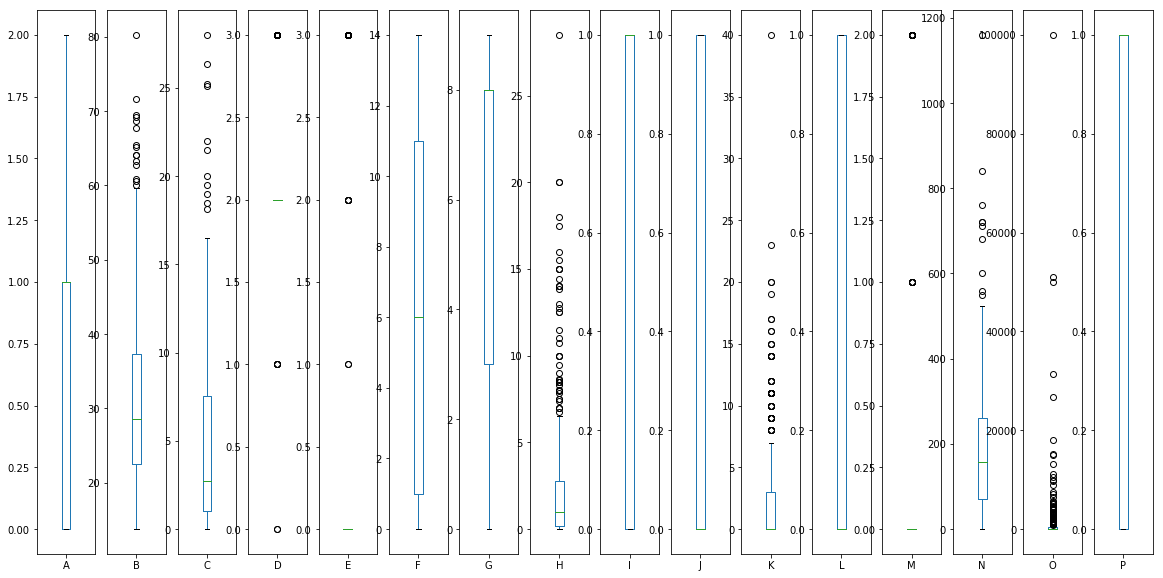

In [640]:
data.plot(kind='box',subplots=True,sharex=False,sharey=False,figsize=(20,10))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000145A56C8D68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000145A1E89EF0>]], dtype=object)

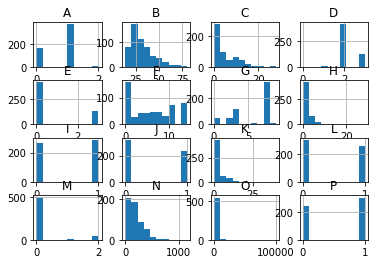

In [642]:
data.hist()

In [643]:
x=data.loc[:,'P']
y=data.loc[:,'N']

In [644]:
##plt.plot(x,y)
#plt.xlabel('x')
#plt.ylabel('y')
#plt.show()

In [645]:
data=data.apply(pd.to_numeric)
data.info()
data=pd.DataFrame(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 16 columns):
A    552 non-null float64
B    552 non-null float64
C    552 non-null float64
D    552 non-null float64
E    552 non-null float64
F    552 non-null float64
G    552 non-null float64
H    552 non-null float64
I    552 non-null float64
J    552 non-null float64
K    552 non-null float64
L    552 non-null float64
M    552 non-null float64
N    552 non-null float64
O    552 non-null float64
P    552 non-null float64
dtypes: float64(16)
memory usage: 69.1 KB


In [ ]:
##Outlier Treatment

In [646]:
median_B=data["B"].median()
data["B"] = np.where(data["B"] >60,median_B,data["B"])

In [647]:
median_c=data['C'].median()
data['C']=np.where(data['C']>18,median_c,data['C'])

In [648]:
median_h=data['H'].median()
data['H']=np.where(data['H']>6,median_h,data['H'])

In [649]:
median_n=data['N'].median()
data['N']=np.where(data['N']>500,median_n,data['N'])

In [650]:
#data=data.drop('O',axis=1)


CHecking Feature importance

In [669]:
x=data.drop('P',axis=1)
y=data['P']

In [670]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [671]:
RF=RandomForestClassifier()

In [672]:
RF.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [673]:
y_pre=RF.predict(x_test)

In [674]:
print(accuracy_score(y_test,y_pre))
print(roc_auc_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))

0.987951807229
0.987865497076
[[75  1]
 [ 1 89]]


In [675]:
RF.feature_importances_

array([ 0.00875821,  0.05212515,  0.08647185,  0.01466735,  0.01570759,
        0.05326521,  0.02798188,  0.0853009 ,  0.33900639,  0.06300088,
        0.07583167,  0.0151618 ,  0.00670872,  0.0776777 ,  0.07833471])

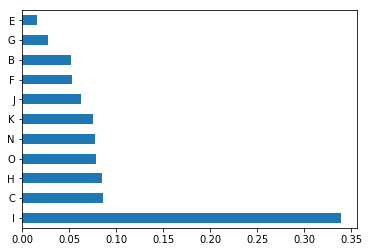

In [676]:
feature_imp=pd.Series(RF.feature_importances_,index=x_train.columns)
feature_imp=feature_imp.nlargest(11)
feature_imp.plot(kind='barh')

In [677]:
x=data.loc[:,['I','O','J','B','H','C','N','F','K','J','F']]
y=data.loc[:,'P']

In [678]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [679]:
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [680]:
y_pred_rf=RF.predict(x_test)

In [681]:
print(accuracy_score(y_test,y_pred_rf))
print(roc_auc_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))


0.855421686747
0.856351981352
[[68 10]
 [14 74]]


DUmmy Variable cfreation

In [784]:
data_dum=pd.get_dummies(data=data,columns=["A",'D','E','F','G','I','J','L','M'])
                       

In [683]:
data_dum.head()

,B,C,H,K,N,O,P,A_0.0,A_1.0,A_2.0,...,G_9.0,I_0.0,I_1.0,J_0.0,J_1.0,L_0.0,L_1.0,M_0.0,M_1.0,M_2.0
0,18.42,10.415,0.125,0.0,120.0,375.0,1.0,0,1,0,...,0,0,1,1,0,1,0,1,0,0
1,21.75,11.750,0.250,0.0,180.0,0.0,1.0,1,0,0,...,0,1,0,1,0,0,1,1,0,0
2,30.17,1.085,0.040,0.0,170.0,179.0,1.0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
3,22.67,2.540,2.585,0.0,0.0,0.0,0.0,0,1,0,...,0,0,1,1,0,1,0,1,0,0
4,36.00,1.000,2.000,11.0,0.0,456.0,0.0,1,0,0,...,0,0,1,0,1,1,0,1,0,0


In [684]:
##data_dum.info()

In [685]:
data_dum=data_dum.drop(['M_0.0','L_0.0','J_0.0','I_0.0','G_0.0','F_0.0','E_0.0','D_0.0','A_0.0'],axis=1)

In [686]:
data_dum=data_dum.drop(['G_9.0','D_3.0','E_3.0'],axis=1)

In [687]:
data_dum.shape

(552, 40)

In [688]:
x=data_dum.drop('P',axis=1)
y=data_dum['P']

In [689]:
x.shape

(552, 39)

# Model Building:Fitting Different type of model

In [690]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [691]:
##Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [692]:
y_pred=lr.predict(x_test)

In [785]:
#y_pred

In [694]:
from sklearn.metrics import confusion_matrix,cohen_kappa_score,accuracy_score,roc_auc_score

In [695]:
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.879518072289
0.882239952719
[[65  7]
 [13 81]]


In [711]:
##Random Forest
from sklearn.ensemble import RandomForestClassifier

In [712]:
##rf=RandomForestClassifier(n_estimators=200,criterion='entropy')

In [713]:
rf=RandomForestClassifier(n_estimators=100,max_depth=8,max_features =10,criterion = 'entropy')

In [714]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [715]:
y_pred_rf=rf.predict(x_test)

In [716]:
print(accuracy_score(y_test,y_pred_rf))
print(roc_auc_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

0.897590361446
0.896572104019
[[64  8]
 [ 9 85]]


In [717]:
##Decission Tree Classifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedShuffleSplit

In [718]:
param_grid={}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, scoring='roc_auc', cv=StratifiedShuffleSplit(100))

In [719]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=None, test_size='default',
            train_size=None),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [720]:
y_pred_gred=grid.predict(x_test)

In [721]:
print(accuracy_score(y_test,y_pred_gred))
print(roc_auc_score(y_test,y_pred_gred))
print(confusion_matrix(y_test,y_pred_gred))

0.83734939759
0.840130023641
[[62 10]
 [17 77]]


In [722]:
rf = RandomForestClassifier(warm_start=True, n_estimators=80,
                            max_depth=9,
                            max_features = 16, 
                            criterion = 'entropy')
params={}
grid_rf=GridSearchCV(rf,param_grid=params,scoring='roc_auc',n_jobs=1,iid=False,cv=10)

In [723]:
grid_rf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=9, max_features=16, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True),
       fit_params=None, iid=False, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [724]:
y_pred_grf=grid_rf.predict(x_test)

In [725]:
print(accuracy_score(y_test,y_pred_grf))
print(roc_auc_score(y_test,y_pred_grf))
print(confusion_matrix(y_test,y_pred_grf))

0.885542168675
0.887559101655
[[65  7]
 [12 82]]


In [726]:
##XGBOOst
import xgboost as xgb
n_estimators = [50]
max_depth = [5]
learning_rate = [0.1]
subsample = [1.0]
colsample_bytree = [0.7]
colsample_bylevel = [0.6]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1]
xgb.XGBClassifier()
param_grid = dict(xgbclassifier__n_estimators=n_estimators, 
                  xgbclassifier__max_depth=max_depth, 
                  xgbclassifier__learning_rate=learning_rate, 
                  xgbclassifier__subsample=subsample, 
                  xgbclassifier__colsample_bytree=colsample_bytree, 
                  xgbclassifier__colsample_bylevel=colsample_bylevel,
                  xgbclassifier__gamma=gamma
                 )

grid_xgb = GridSearchCV(xgb.XGBClassifier(), param_grid, scoring="roc_auc", n_jobs=-1, cv=10)


In [450]:
##grid_xgb.fit(x_train,y_train)

In [451]:
##y_pred_xgb=grid_xgb.predict(x_test)

In [727]:
##Stacking Clasifier
from mlxtend.classifier import StackingClassifier
df=DecisionTreeClassifier()

In [728]:
rf=RandomForestClassifier()
lr=LogisticRegression()
df=DecisionTreeClassifier()
stc=StackingClassifier(classifiers=[rf,lr,df],meta_classifier=lr)

In [729]:
stc.fit(x_train,y_train)

StackingClassifier(average_probas=False,
          classifiers=[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_f...       min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')],
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          refit=True, store_train_meta_features=False,
          use_features_in_secondary=False, use_probas=False, verbose=0)

In [730]:
y_pred_stc=stc.predict(x_test)

In [731]:
print(accuracy_score(y_test,y_pred_stc))
      
print(roc_auc_score(y_test,y_pred_stc))
print(confusion_matrix(y_test,y_pred_stc))

0.855421686747
0.860963356974
[[65  7]
 [17 77]]


In [786]:
from sklearn.neighbors import KNeighborsClassifier

In [799]:
kn=KNeighborsClassifier(n_neighbors=50)

In [800]:
kn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [801]:
y_pred_kn=kn.predict(x_test)

In [802]:
print(accuracy_score(y_test,y_pred_kn))
print(roc_auc_score(y_test,y_pred_kn))
print(confusion_matrix(y_test,y_pred_kn))

0.728915662651
0.716755319149
[[45 27]
 [18 76]]


In [732]:
##BaggingClassification
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [733]:
cart=DecisionTreeClassifier()
model=BaggingClassifier(base_estimator=cart,n_estimators=100,bootstrap=True,random_state=10)

In [734]:
model_selection.cross_val_score(model,x,y,cv=10).mean()

0.86221260221260221

In [735]:
model.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=10, verbose=0, warm_start=False)

In [762]:
x_train.shape

(386, 39)

In [737]:
y_pred_bg=model.predict(x_test)

In [738]:
print(accuracy_score(y_test,y_pred_bg))
print(roc_auc_score(y_test,y_pred_bg))
print(confusion_matrix(y_test,y_pred_bg))

0.909638554217
0.9088356974
[[65  7]
 [ 8 86]]


In [739]:
##Naive Bayse
from sklearn import naive_bayes

In [740]:
nb=naive_bayes.GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None)

In [741]:
y_pred_nb=nb.predict(x_test)

In [742]:
print(accuracy_score(y_test,y_pred_nb))
print(roc_auc_score(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))

0.801204819277
0.791962174941
[[52 20]
 [13 81]]


In [743]:
##Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=1,max_depth=2,random_state=0)

In [744]:
gbc.fit(x_train,y_train)
y_pred_gbc=gbc.predict(x_test)

In [745]:
print(accuracy_score(y_test,y_pred_gbc))
print(roc_auc_score(y_test,y_pred_gbc))
print(confusion_matrix(y_test,y_pred_gbc))

0.83734939759
0.836879432624
[[60 12]
 [15 79]]


# Applying on Test Dataset

In [776]:
test=pd.read_csv(r"E:\Praxis-BA-18\Term-2\datasets\makemytrip\dataset\test.csv")

In [748]:
test.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,553,b,29.17,3.500,u,g,w,v,3.500,t,t,3,t,g,329.0,0
1,554,b,28.33,5.000,u,g,w,v,11.000,t,f,0,t,g,70.0,0
2,555,b,29.25,14.790,u,g,aa,v,5.040,t,t,5,t,g,168.0,0
3,556,a,44.17,6.665,u,g,q,v,7.375,t,t,3,t,g,0.0,0
4,557,b,18.08,5.500,u,g,k,v,0.500,t,f,0,f,g,80.0,0


In [749]:
test.isnull().sum()

id    0
A     4
B     3
C     0
D     1
E     1
F     2
G     2
H     0
I     0
J     0
K     0
L     0
M     0
N     2
O     0
dtype: int64

In [750]:
test=test.drop('id',axis=1)

In [751]:
test['A']=le.fit_transform(test['A'].astype(str))
test['D']=le.fit_transform(test['D'].astype(str))
test['E']=le.fit_transform(test['E'].astype(str))
test['F']=le.fit_transform(test['F'].astype(str))
test['G']=le.fit_transform(test['G'].astype(str))
test['I']=le.fit_transform(test['I'].astype(str))
test['J']=le.fit_transform(test['J'].astype(str))
test['M']=le.fit_transform(test['M'].astype(str))
test['L']=le.fit_transform(test['L'].astype(str))

In [752]:
test.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,1,29.17,3.500,1,0,13,7,3.500,1,1,3,1,0,329.0,0
1,1,28.33,5.000,1,0,13,7,11.000,1,0,0,1,0,70.0,0
2,1,29.25,14.790,1,0,0,7,5.040,1,1,5,1,0,168.0,0
3,0,44.17,6.665,1,0,11,7,7.375,1,1,3,1,0,0.0,0
4,1,18.08,5.500,1,0,8,7,0.500,1,0,0,0,0,80.0,0


In [753]:
test.isnull().sum()

A    0
B    3
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
N    2
O    0
dtype: int64

In [754]:
df1=fai.complete(test)
test=pd.DataFrame(df1)

In [755]:
var=['A','B',"C","D",'E',"F",'G','H',"I",'J','K',"L",'M',"N",'O']
test.columns=var

In [756]:
test.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,1.0,29.17,3.500,1.0,0.0,13.0,7.0,3.500,1.0,1.0,3.0,1.0,0.0,329.0,0.0
1,1.0,28.33,5.000,1.0,0.0,13.0,7.0,11.000,1.0,0.0,0.0,1.0,0.0,70.0,0.0
2,1.0,29.25,14.790,1.0,0.0,0.0,7.0,5.040,1.0,1.0,5.0,1.0,0.0,168.0,0.0
3,0.0,44.17,6.665,1.0,0.0,11.0,7.0,7.375,1.0,1.0,3.0,1.0,0.0,0.0,0.0
4,1.0,18.08,5.500,1.0,0.0,8.0,7.0,0.500,1.0,0.0,0.0,0.0,0.0,80.0,0.0


In [757]:
##test=test.drop(['K','O'],axis=1)

In [758]:
test.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
N    0
O    0
dtype: int64

In [604]:
RF_pred=RF.predict(test)

In [759]:
test_dum=pd.get_dummies(data=test,columns=["A","D",'E','F','G',"I",'J',"L","M"])

In [767]:
test_dum.head()

,B,C,H,K,N,O,A_0.0,A_1.0,A_2.0,D_0.0,...,G_8.0,I_0.0,I_1.0,J_0.0,J_1.0,L_0.0,L_1.0,M_0.0,M_1.0,M_2.0
0,29.17,3.500,3.500,3.0,329.0,0.0,0,1,0,0,...,0,0,1,0,1,0,1,1,0,0
1,28.33,5.000,11.000,0.0,70.0,0.0,0,1,0,0,...,0,0,1,1,0,0,1,1,0,0
2,29.25,14.790,5.040,5.0,168.0,0.0,0,1,0,0,...,0,0,1,0,1,0,1,1,0,0
3,44.17,6.665,7.375,3.0,0.0,0.0,1,0,0,0,...,0,0,1,0,1,0,1,1,0,0
4,18.08,5.500,0.500,0.0,80.0,0.0,0,1,0,0,...,0,0,1,1,0,1,0,1,0,0


In [770]:
test_dum=test_dum.drop(['A_0.0','D_0.0','E_0.0','F_0.0','G_0.0','I_0.0','J_0.0',"L_0.0",'M_0.0'],axis=1)

In [771]:
test_dum.shape

(138, 39)

In [275]:
##test_dum=test_dum.drop(['O','K'],axis=1)

In [276]:
##data_dum.shape

(552, 38)

In [310]:
##test_dum.isnull().sum()

In [772]:
test_dum.shape

(138, 39)

In [429]:
test_pred_rf=rf.predict(test_dum)

In [311]:
##test_pred_bg=model.predict(test_dum)

In [312]:
test_pred_gbc=gbc.predict(test_dum)

In [350]:
test_pred_gr=grid_rf.predict(test_dum)

In [773]:
test_pred_bg=model.predict(test_dum)

In [280]:
test_pred_lr=lr.predict(test_dum)

In [313]:
##test_pred

In [778]:
test['P']=pd.Series(test_pred_bg)

In [779]:
test.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,553,b,29.17,3.500,u,g,w,v,3.500,t,t,3,t,g,329.0,0,0.0
1,554,b,28.33,5.000,u,g,w,v,11.000,t,f,0,t,g,70.0,0,0.0
2,555,b,29.25,14.790,u,g,aa,v,5.040,t,t,5,t,g,168.0,0,0.0
3,556,a,44.17,6.665,u,g,q,v,7.375,t,t,3,t,g,0.0,0,0.0
4,557,b,18.08,5.500,u,g,k,v,0.500,t,f,0,f,g,80.0,0,0.0


In [780]:
sub_data=test.loc[:,['id','P']]

In [781]:
sub_data.head()

,id,P
0,553,0.0
1,554,0.0
2,555,0.0
3,556,0.0
4,557,0.0


In [782]:
sub_data.to_csv(r'E:\Praxis-BA-18\Term-2\datasets\makemytrip\dataset\submission.csv')

# Maximum accuracy Found using BaggingClassifier with esitmator as Decission tree